<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/Advertising_Sales_Dataset_ML_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Advertising Dataset coressponding to sales target values - Implemented using Linear Regression **

In [9]:
# import all libraries -->
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load the testing dataset -->
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Advertising.csv',index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
# EDA -->
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [12]:
df.shape

(200, 4)

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


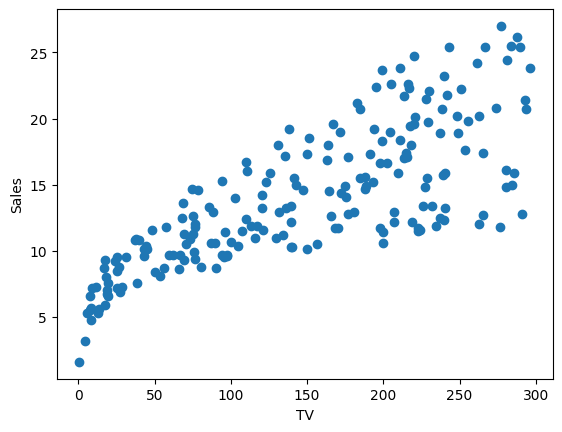

In [15]:
# select features value and target value --->
x1 = df['TV']
y1 = df['sales']

plt.scatter(x1,y1)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [26]:
# implemented with the help of single linear regression --->
# step 1 -> for having a best fit line -> take any value for w0 and w1 we can have an error
w0 = 4
w1 = 5
yh = w0 + w1*x1

In [27]:
error = ((y1 - yh)**2).mean()
print(error)

705793.6179999998


In [28]:
dew0 = -2 * (y1 - yh).mean()
print(dew0)

dew1 = -2 * (x1 * (y1 - yh)).mean()
print(dew1)

1450.38
285911.1761


In [29]:
lr = 0.00001
w0 = w0 - lr * dew0
w1 = w1 - lr * dew1
print(w0, w1)

3.9854962 2.140888239


In [30]:
yh = w0 + w1 * x1
error = ((y1 - yh)**2).mean()
print(error)                               # error is decreased

125030.83841161242


In [33]:
# step 2 -> now reduce the above weighted error value using GD method --> using loop
w0 = 7
w1 = 7
for i in range(200):
  # best fit line
  yh = w0 + w1*x1
  # gradient
  dew0 = -2*(y1 - yh).mean()
  dew1 = -2*(x1* (y1 - yh)).mean()
  # update the weights -> reduce the learning rate value conitinously
  lr = 0.00001
  w0 = w0 - 0.00001*dew0
  w1 = w1 - 0.00001*dew1

  # calculate error -->
  error = ((y1 - yh)**2).mean()                     # now we are getting minimum error around 10.5
  print(i,error)

0 1399562.9880000001
1 247919.22370335885
2 43923.64288834257
3 7789.03400824266
4 1388.3563381540596
5 254.57695306093504
6 53.74576605700957
7 18.171679764045138
8 11.870289845142029
9 10.75409771393774
10 10.556381822639496
11 10.52135955226227
12 10.515155898130551
13 10.51405700863322
14 10.51386234790777
15 10.513827857088447
16 10.513821737849085
17 10.513820644189009
18 10.513820440731363
19 10.513820394959176
20 10.513820377118586
21 10.51382036422574
22 10.513820352209407
23 10.51382034034843
24 10.513820328515074
25 10.513820316686711
26 10.513820304859323
27 10.513820293032213
28 10.51382028120525
29 10.513820269378412
30 10.513820257551693
31 10.513820245725094
32 10.513820233898617
33 10.513820222072258
34 10.513820210246017
35 10.513820198419898
36 10.513820186593898
37 10.513820174768018
38 10.513820162942256
39 10.51382015111662
40 10.513820139291097
41 10.513820127465697
42 10.513820115640417
43 10.513820103815256
44 10.513820091990215
45 10.513820080165294
46 10.5138

In [35]:
# updated weight value -->
print(w0,w1)

# average minimum error -->
avg_error = abs(y1 - yh).mean()                     # global minima point
print(avg_error)

6.964764146239706 0.04788109521865454
2.546585636826776


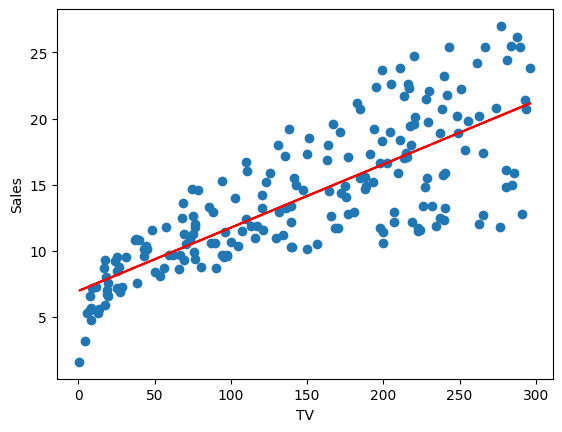

In [37]:
plt.scatter(x1,y1)
plt.plot(x1,yh,color = 'red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [38]:
# if Tv_expenses was known -->
tv_exp = 57
predicted_sales = w0 + w1*tv_exp
print(predicted_sales)

9.693986573703015


** Implemented this Advertising Sales dataset using Multi-linear Regression **

In [40]:
x2 = df[['TV','radio']]                       # feature-value
y2 = df['sales']                              # target-value

In [42]:
# best fit line equation -> yh = w0 + w1 * x2.Tv + w2 * x2.radio

w0 = 4
w1 = 5
w2 = 3

for i in range(1000):
  yh = w0 + w1*x2['TV'] + w2*x2['radio']

  dew0 = -2*(y2 - yh).mean()
  dew1 = -2*(x2.TV * (y2 - yh)).mean()
  dew2 = -2*(x2.radio * (y2 - yh)).mean()

  lr = 0.00001
  w0 = w0 - lr * dew0
  w1 = w1 - lr * dew1
  w2 = w2 - lr * dew2

  error = ((y2 - yh)**2).mean()                              # error is reduced to 2.9 around -> global minima point
  print(i,error)

0 815682.313
1 140035.37253858242
2 25129.932864125763
3 5573.734877745337
4 2231.044854887773
5 1645.5462439716546
6 1529.111430490622
7 1492.6620264265255
8 1470.0357729094133
9 1449.9794087826078
10 1430.576489343815
11 1411.498249928344
12 1392.685935056984
13 1374.1267399490403
14 1355.8157109011872
15 1337.7492662907891
16 1319.9240943861867
17 1302.3369654408236
18 1284.9846992595708
19 1267.8641592081199
20 1250.972250725136
21 1234.3059206063256
22 1217.8621564259445
23 1201.6379859877788
24 1185.630476787153
25 1169.8367354807494
26 1154.2539073636174
27 1138.8791758531866
28 1123.709761980167
29 1108.7429238862567
30 1093.9759563285502
31 1079.4061901905702
32 1065.030991999826
33 1050.8477634518158
34 1036.8539409403859
35 1023.0469950943598
36 1009.4244303203584
37 995.9837843517223
38 982.7226278034597
39 969.6385637331365
40 956.7292272076324
41 943.9922848756801
42 931.4254345461143
43 919.0264047717523
44 906.7929544388331
45 894.7228723619369
46 882.8139768843159
47 8

In [43]:
print(w0,w1,w2)

3.935171328655304 0.042276833412625316 0.17409490243349757


In [44]:
tv_expenses = 56.7
radio_expenses = 100

predicted_sales = w0 + w1 * tv_expenses + w2 * radio_expenses
print(predicted_sales)

23.741758026500918


In [45]:
# calculate avg error ->
avg_error = abs(y2 - yh).mean()
print(avg_error)

1.2447717043378939
